In [ ]:
# PART 3

In [5]:
# 1)
!pip install ydata-profiling 
import numpy as np
import pandas as pd
from IPython.display import FileLink
from ydata_profiling import ProfileReport
df = pd.read_csv("/Users/m.sushanthreddy/Downloads/red_wine.csv")
profile = ProfileReport(df, title="report")
profile.to_notebook_iframe()
profile.to_file("profile_report.html")
FileLink("profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

/Users/m.sushanthreddy/profile_report.html

In [10]:
# 2)
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("/Users/m.sushanthreddy/Downloads/red_wine.csv")

y = df.iloc[:, -1]
X = df.iloc[:, :-1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

models = {
    "Baseline": DummyClassifier(strategy="most_frequent"),
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Naïve Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM-Linear": SVC(kernel="linear", probability=True),
    "SVM-RBF": SVC(kernel="rbf", probability=True),
    "Random Forest": RandomForestClassifier()
}

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

def evaluate_model(model, X, y):
    accuracy = cross_val_score(model, X, y, cv=cv, scoring='accuracy').mean()
    y_pred_prob = cross_val_predict(model, X, y, cv=cv, method='predict_proba')[:, 1] if hasattr(model, 'predict_proba') else None
    auc = roc_auc_score(y, y_pred_prob) if y_pred_prob is not None else "N/A"
    return accuracy, precision, recall, f1, auc

for name, model in models.items():
    accuracy, precision, recall, f1, auc = evaluate_model(model, X_scaled, y)
    print(f"{name}:")
    print(f"  AUC: {auc}")
    print(f"  Accuracy: {accuracy:.4f}")


Baseline:
  AUC: 0.5
  Accuracy: 0.5289
Logistic Regression:
  AUC: 0.874923065560452
  Accuracy: 0.7949
Naïve Bayes:
  AUC: 0.8904945961249662
  Accuracy: 0.8248
Decision Tree:
  AUC: 0.8187055318939412
  Accuracy: 0.8071
SVM-Linear:
  AUC: 0.8754523745045422
  Accuracy: 0.7861
SVM-RBF:
  AUC: 0.9215945739678475
  Accuracy: 0.8405
Random Forest:
  AUC: 0.9209852532066275
  Accuracy: 0.8404


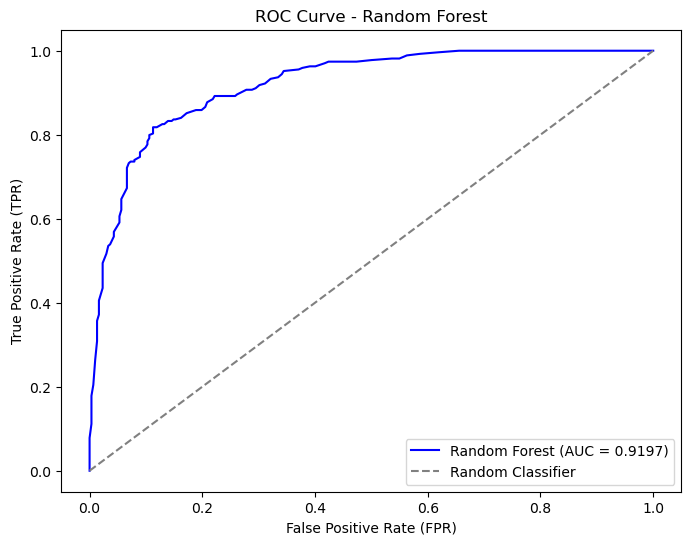

In [21]:
# 3)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder

%matplotlib inline  

df = pd.read_csv("/Users/m.sushanthreddy/Downloads/red_wine.csv")

y = df.iloc[:, -1]
X = df.iloc[:, :-1]

y = LabelEncoder().fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

rf_model = RandomForestClassifier()
y_pred_prob_rf = cross_val_predict(rf_model, X_scaled, y, cv=cv, method='predict_proba')[:, 1]
fpr, tpr, _ = roc_curve(y, y_pred_prob_rf)
auc_score = roc_auc_score(y, y_pred_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc_score:.4f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Classifier")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

AUC Score: 0.9455
Accuracy: 0.8125


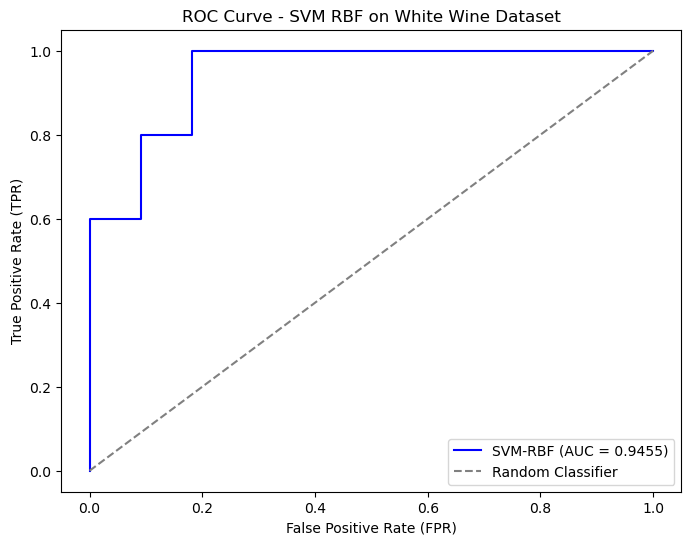

In [26]:
# 4)
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve

df_white = pd.read_csv("/Users/m.sushanthreddy/Downloads/white_wine.csv")

y_white = df_white.iloc[:, -1]
X_white = df_white.iloc[:, :-1] 

y_white = LabelEncoder().fit_transform(y_white)

scaler = StandardScaler()
X_white_scaled = scaler.fit_transform(X_white)

X_train, X_test, y_train, y_test = train_test_split(X_white_scaled, y_white, test_size=0.2, random_state=42)

svm_rbf = SVC(kernel='rbf', probability=True, random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_prob = svm_rbf.predict_proba(X_test)[:, 1]
y_pred = svm_rbf.predict(X_test)
auc_score = roc_auc_score(y_test, y_pred_prob)
accuracy = accuracy_score(y_test, y_pred)

print(f"AUC Score: {auc_score:.4f}")
print(f"Accuracy: {accuracy:.4f}")

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'SVM-RBF (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - SVM RBF on White Wine Dataset")
plt.legend()
plt.show()